# 쿠버네티스 구성 관련 용어

**Pod**
- 컨테이너와 볼륨을 함께 묶은 것
- 파드 하나가 컨테이너 하나지만 컨테이너가 여러 개인 파드도 있을 수 있음 
- 파드에 포함되는 볼륨은 기본적으로 함께 파드에 포함되는 컨테이너가 정보를 공유하기 위해 사용하는 것으로, 파드에 볼륨이 없는 경우도 많음

**서비스**
- 파드를 모은 것 
- 여러 개의 파드를 이끄는 반장
- 서비스가 관리하는 파드는 모두 기본적으로 동일한 구성을 갖음 
- 서비스의 역할은 로드 밸런서 
- 각 서비스는 자동적으로 고정된 IP 주소를 부여받고 이 주소로 들어오는 통신을 처리 
- 서비스가 분배하는 통신은 한 워커 노드 안으로 국한됨

**레플리카세트**
- 파드의 수를 관리하는 반장

**요청과 관련된 용어**
- 서비스
- 클러스터IP

**수와 관련된 것**
- 레플리카세트
- 디플로이먼트 

# 쿠버네티스 설치

**쿠버네티스**
- 클라우드 네이티브 컴퓨팅 재단이라는 단체에서 재정한 표준 

**원조 쿠버네티스**
- 원조 쿠버네티스를 채택하는 것 자체는 꽤 흔하지만 이를 '직접 구축'하는 것은 별개의 문제
- 대개는 외주로 구축 맡김
- 일반적으로는 AWS 같은 클라우드 컴퓨팅 서비스를 사용해 구축하는 경우도 많음 
- 강력한 서버가 여러 대 필요

**도커 데스크톱 쿠버네티스**
- 도커 데스크톱에는 쿠버네티스가 포함
- 리눅스에서는 Minikube라는 간단히 사용할 수 있는 쿠버네티스가 있음 
- 컴퓨터 한 대로도 가능

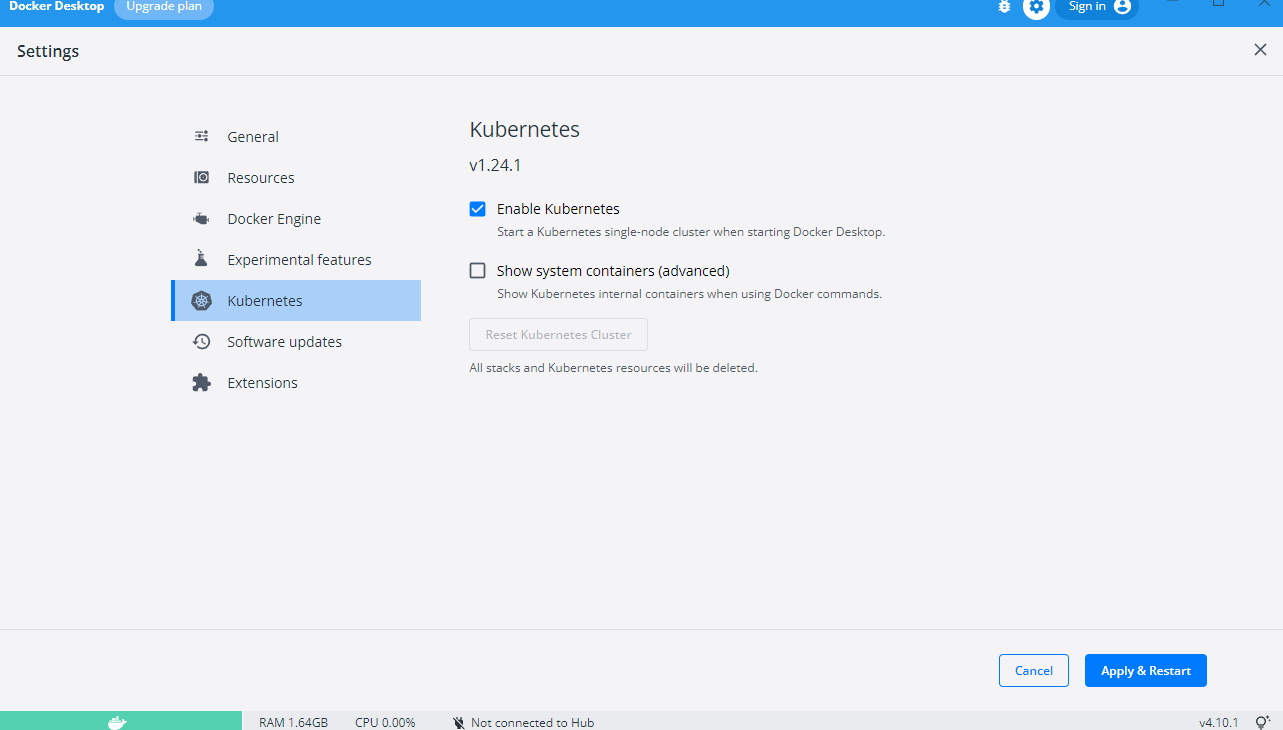

## 성공 결과

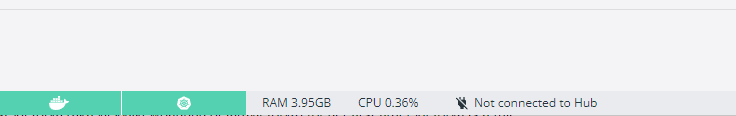

# 매니페스트 파일(정의 파일) 작성

**매니페스트**
- 파드나 서비스에 대한 설정

**매니페스트 파일**
- 쿠버네티스는 매니페스트 파일에 기재된 내용에 따라 파드 생성
- 매니페스트 파일의 내용을 쿠버네티스에 업로드하면 그 내용이 데이터베이스(etcd)에 바람직한 상태로 등록되며, 서버 환경을 이 바람직한 상태로 유지 
- YAML 또는 JSON 형식으로 기재 
- 리소스 단위로 작성
- 리소스는 파드, 서비스, 디플로이먼트, 레플리카세트 등을 가리킴 
- 초보자가 다루는 주요 리소스는 디플로이먼트, 서비스 두 가지 
- 디플로이먼트 항목에 레플리카세트와 파드 포함 
- 리소스 단위로 분할해 작성해도 되고, 한 파일에 합쳐 작성해도 됨(디플로이먼트, 서비스 따로, 아니면 합쳐서)

**매니페스트 파일 작성 내용**
- 네 가지 주 항목
- apiVersion : API 그룹 및 버전, 작성할 내용 정형화
- kind : 리소스 유형, 작성할 내용 정형화
- metadata : 메타데이터, 리소스의 유형이나 설정 내용에 따라 작성 내용 달라짐
- spec : 리소스 내용, 리소스의 유형이나 설정 내용에 따라 작성 내용 달라짐
- API 그룹과 리소스 유형은 공식 사이트 확인하면 알 수 있음 

**metadata**
- 리소스의 이름이나 레이블 기재
- 레이블을 부여하면 셀렉터 기능을 사용해 특정 레이블이 부여된 파드만을 배포하는 등 특정 파트 선택해 설정 가능 

**spec**
- 리소스의 내용 정의
- 어떤 리소스를 만들 것인가

In [1]:
metadata:
  name: 파드의 이름
  labels: 레이블
spec:
  containers: 컨테이너 구성
    - name: 컨테이너 이름
      image: 이미지 이름
      ports: 포트 설정

SyntaxError: invalid syntax (1257171374.py, line 1)

## 파드

In [ ]:
apiVersion: v1
kind: Pod
metadata:
  name: apa000pod
  labels:
    app: apa000kube
spec:
  containers:
    - name: apa000ex91
      image: httpd
       ports:
      - containerPort: 80

## 디플로이먼트

In [ ]:
apiVersion: apps/v1
kind: Deployment
metadata:
  name: apa000dep # 디플로이먼트 이름
spec:
  selector: # 셀렉터 설정
    matchLabels: # 셀렉터가 선택할 관리 대상 레이블
      app: apa000kube
  replicas: 3 # 레플리카 설정
  template: # 템플릿(파드의 정보)
    metadata:# 파드의 메타데이터
      labels: 
        app: apa000kube
    spec: # 파드의 스펙 
      containers:
      - name: apa000ex91
        image: httpd
        ports:
        - containerPort: 80